In [2]:
%pylab inline

import numpy as np
from tqdm import *
from matplotlib import pyplot as plt


class MLP(object):
    
    def __init__ (self, input_size, output_size, num_layers, num_neurons, learning_rate):
        # Set hyperparameters for MLP        
        self.input_size = input_size
        self.output_size = output_size
        self.learning_rate = learning_rate

        self.num_layers = num_layers
        self.num_neurons = num_neurons
        
        # Create the matrix of neurons
        self.weights = []
        self.bias = []
        
        # Set weights and biases from input to first HL
        self.weights.append(self.get_weights(num_neurons, input_size))
        self.bias.append(self.get_weights(num_neurons, 1))
        
        # Set weights and biases for the next HLs
        for i in xrange(1, num_layers):
            self.weights.append(self.get_weights(num_neurons, num_neurons))
            self.bias.append(self.get_weights(num_neurons, 1))
        
        # Set weights and biases from last HL to output
        self.weights.append(self.get_weights(output_size, num_neurons))
        self.bias.append(self.get_weights(output_size, 1))
        
        # Set rest of the params
        self.sigmoid = np.vectorize(self.sigmoid)
        self.sigmoid_prime = np.vectorize(self.sigmoid_prime)
    #end init
    
    def get_weights(self,x,y):
        return np.random.normal(0,1,(x,y))
    #end get_weights
        
    def sigmoid(self, z):
        e_z = np.exp(-z)
        output = 1.0/(1.0 + e_z)
        return output
    #end sigmoid
    
    def sigmoid_prime(self, z):
        e_z = np.exp(-z)
        output = e_z/((1.0 + e_z)**2)
        return output
    #end sigmoid_prime
    
    def feed_forward(self, mlp_input):
        A = []
        Z = []
        output = mlp_input
        for i in xrange(0, len(self.weights)):          # For each layer of MLP
            
#             print("INPUT")
#             print output
        
#             print("WEIGHTS")
#             print(self.weights[i])
            out_len = len(output)
            output = np.dot(self.weights[i], output) # Multiply by the weights
            output = output/out_len
#             print output
            
#             print("BIAS")
#             print(self.bias[i])
            output += self.bias[i]                   # Add the biases
            
            Z.append(output)
            output = self.sigmoid(output)            # Perform sigmoid function all
                                                     # elements of the resultant matrix
            A.append(output)
            
        return Z, A, output
    # end feed forward
    
    def back_prop(self, n, mlp_input, Z, A, mlp_out, mlp_ground):
        delta = np.multiply((mlp_out - mlp_ground),self.sigmoid_prime(Z[len(Z)-1])) 
        deltas = [delta]
        for i in reversed(xrange(0,len(self.weights)-1)):
            delta = np.multiply(np.dot(np.transpose(self.weights[i+1]),delta),self.sigmoid_prime(Z[i]))
            deltas.insert(0,delta)
        A.insert(0,mlp_input)
        for i in reversed(xrange(0,len(self.weights))):
            self.weights[i] = self.weights[i] - (self.learning_rate/n)*(np.dot(deltas[i],np.transpose(A[i])))
            tmp = np.mean(deltas[i],axis=1)
            tmp = np.matrix(tmp)
            tmp = np.transpose(tmp)
            self.bias[i] = self.bias[i] - ((self.learning_rate/n)*tmp)
    # end back_prop
    
    def train(self, n, mlp_input, mlp_ground):
        Z,A,mlp_out = self.feed_forward(mlp_input)
        self.back_prop(n, mlp_input, Z, A, mlp_out, mlp_ground)    
        return np.mean(abs(mlp_ground - mlp_out))
    # end train
        
                            
#     def toString(self):
#         print "PERCEPTRON STRUCTURE:"
#         print "weights: "
#         print self.weights
#         print "bias: "
#         print self.bias
#         return " "
        

Populating the interactive namespace from numpy and matplotlib


100%|██████████████████████████████████████████████████████████████████████████| 10000/10000 [00:02<00:00, 4040.40it/s]

FINAL MLP OUTPUT AFTER EPOCH:
TRAINED      :  [[ 0.00544923  0.99504783  0.99504814  0.00625011]]
GROUND TRUTH :  [[0 1 1 0]]


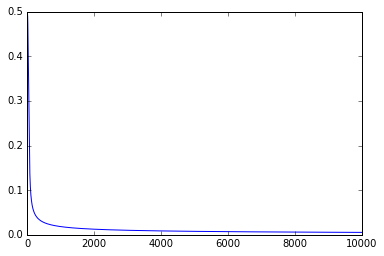

In [4]:
# XOR_INPUT = [[0,0,1,1],
#              [0,1,0,1]]
# XOR_OUTPUT = [0,1,1,0]

XOR_INPUT = np.transpose(np.array([[0,0],[0,1],[1,0],[1,1]]))
XOR_OUTPUT =  np.transpose(np.array([[0],[1],[1],[0]]))
XOR_N = len(XOR_INPUT)

epoch_time = 10000

# input_size = 2
# output_size = 1
# num_layers = 1
# num_neurons = 3
# learning_rate = 20.0
mlp = MLP(2, 1, 1, 3, 20.0)

results = []
for i in tqdm(xrange(epoch_time)):
    results.append(mlp.train(XOR_N, XOR_INPUT,XOR_OUTPUT))

print "FINAL MLP OUTPUT AFTER EPOCH:"
print "TRAINED      : ", mlp.feed_forward(XOR_INPUT)[2]
print "GROUND TRUTH : ", XOR_OUTPUT

plot(results)    

# print "\n\nMLP OUTPUT: \n", mlp_out
# print "Z\n",Z
# print "A\n",A



In [10]:
np.array([[0,],[0,]]).shape

(2L, 1L)

In [11]:
mlp.feed_forward([[0,],[0,]])[2]

array([[ 0.00544923]])